# LFP example with stim strength

In [1]:
from bayes_window import models, fake_spikes_explore, BayesWindow
from bayes_window.generative_models import generate_fake_lfp
from importlib import reload
import numpy as np
import altair as alt
import pandas as pd

## ISI

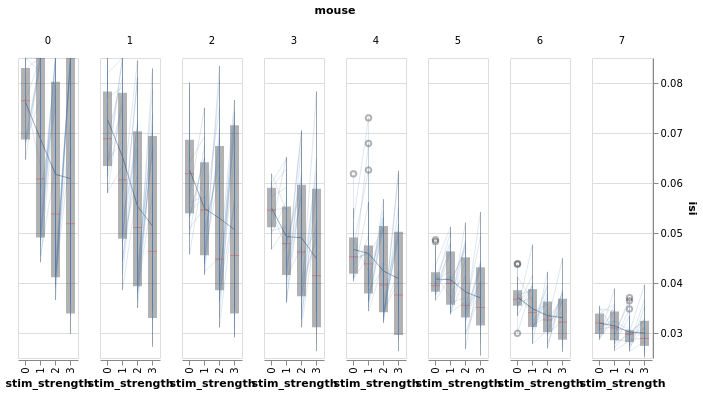

In [2]:
df=[]
for slope in np.linspace(4,40,4):
    df1=generate_fake_lfp(mouse_response_slope=slope)[0] 
    df1['stim_strength']=slope
    df.append(df1)
df=pd.concat(df)


BayesWindow(df, 'isi', treatment='stim_strength',  group='mouse', detail='i_trial').data_box_detail()


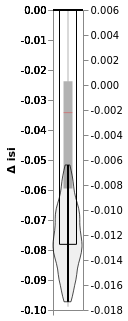

In [3]:
window=BayesWindow(df, 'isi', treatment='stim_strength',  group='mouse', detail='i_trial')
window.fit_slopes(add_group_slope=False,dist_y='gamma')
window.chart

## Power

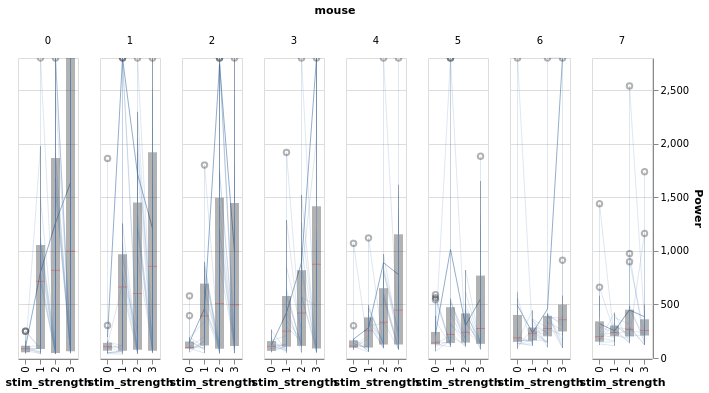

In [4]:
df=[]
for slope in np.linspace(4,400,4):
    df1=generate_fake_lfp(mouse_response_slope=slope)[0] 
    df1['stim_strength']=slope
    df.append(df1)
df=pd.concat(df)


BayesWindow(df, 'Power', treatment='stim_strength',  group='mouse', detail='i_trial').data_box_detail()


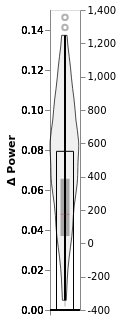

In [5]:
window=BayesWindow(df, 'Power', treatment='stim_strength',  group='mouse', detail='i_trial')
window.fit_slopes(add_group_slope=False,dist_y='gamma')
window.chart

In [6]:
window.posterior['slope']

,higher interval,lower interval,center interval,zero
0,0.137326,0.004873,0.079342,0


In [7]:
window.y in window.data_and_posterior.columns

False

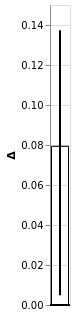

In [8]:
from bayes_window import visualization
alt.layer(*visualization.plot_posterior(df=window.data_and_posterior))

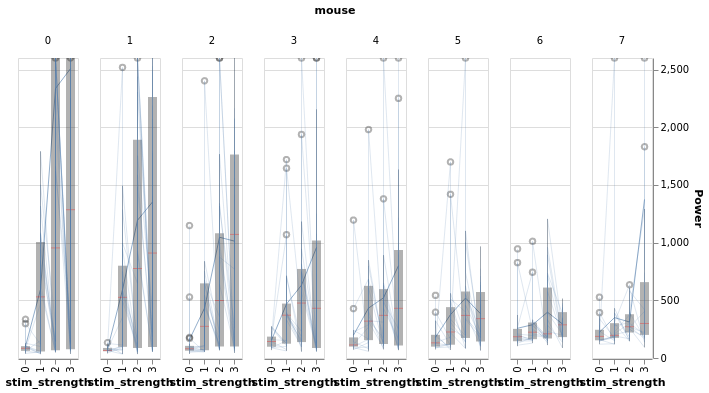

In [9]:
df=[]
for slope in np.linspace(4,400,4):
    df1=generate_fake_lfp(mouse_response_slope=slope)[0] 
    df1['stim_strength']=slope
    df.append(df1)
df=pd.concat(df)


BayesWindow(df, 'Power', treatment='stim_strength',  group='mouse', detail='i_trial').data_box_detail()


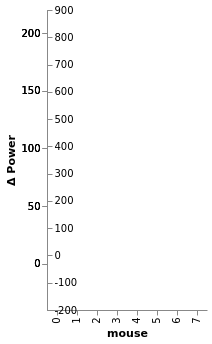

In [28]:
from importlib import reload
from bayes_window import workflow
reload(workflow)

window=workflow.BayesWindow(df, 'Power', treatment='stim_strength',  condition='mouse', detail='i_trial')
window.fit_slopes(add_condition_slope=True,center_intercept=True,dist_y='gamma')
window.chart

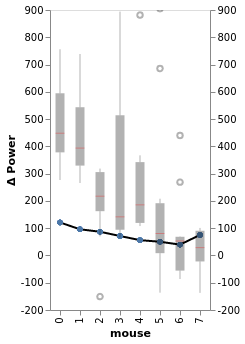

In [44]:
window.chart_posterior_center+window.chart_data_boxplot

In [98]:
base_chart= window.chart_base_posterior
base_chart.data.zero

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
75    0.0
76    0.0
77    0.0
78    0.0
79    0.0
Name: zero, Length: 80, dtype: float64

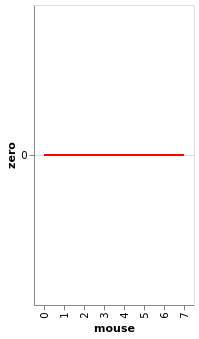

In [102]:
base_chart.mark_line(color='red', ).encode(
                x='mouse:O',
    y=alt.Y(
        'zero:Q',
#             scale=scale,
#         axis=alt.Axis(title='', orient='left')
    )
)

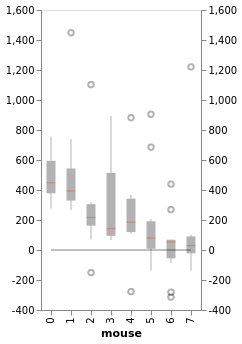

In [107]:
base_chart.mark_line(color='black', size=.5, opacity=1).encode(
                x='mouse:O',
    y=alt.Y(
        'zero',
#             scale=scale,
        axis=alt.Axis(title='', orient='left')
    )
)+\
base_chart.mark_boxplot(
                clip=True, opacity=.3, size=9, color='black',
                median=alt.MarkConfig(color='red', strokeWidth=20)
            ).encode(
                x='mouse:O',
                y=alt.Y(f'Power diff:Q',
                        axis=alt.Axis(orient='right', title=''),
#                         scale=alt.Scale(zero=False, domain=y_domain)
                        )
            )

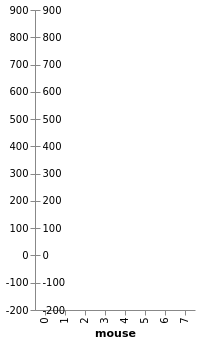

In [60]:
window.chart_zero+window.chart_data_boxplot

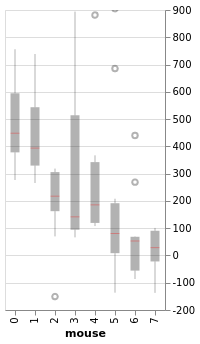

In [39]:
window.charts[3]

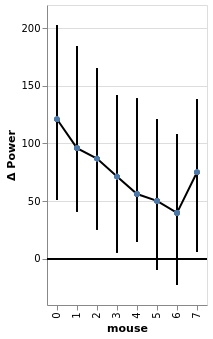

In [36]:
alt.layer(*window.charts[:3])

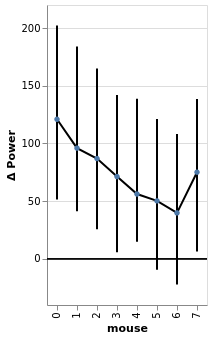

In [37]:
window.chart_posterior_hdi_no_data

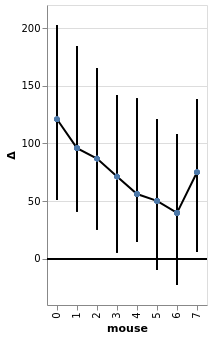

In [14]:
posterior=window.data_and_posterior
base_chart=alt.Chart(posterior)
alt.layer(*visualization.plot_posterior(base_chart=base_chart,x='mouse:O'))

In [ ]:
from bayes_window import visualization
alt.layer(*visualization.plot_posterior(df=window.data_and_posterior,x='mouse:O'))

In [ ]:
window.regression_charts(x=':O', y='center interval',colummn='neuron')

In [ ]:
window.data_and_posterior[['mouse','center interval']]
window.y

In [ ]:
window.posterior['slope_per_condition']

In [ ]:
window.explore_models()